# homework dataset №13

In [1]:
!pip install --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org regex
!pip install --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org rdkit
!pip install --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org chemspipy
from rdkit import Chem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import klib
import plotly.express as ex
import cirpy
import requests
import json
from urllib.request import urlopen
from urllib.parse import quote
warnings.filterwarnings('ignore')
import session_info
import pubchempy as pcp
import re
import chemspipy
from chembl_webresource_client.new_client import new_client
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors, Descriptors3D, rdMolDescriptors, rdchem, AllChem, Fragments, PyMol
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdchem import PeriodicTable, GetPeriodicTable, EditableMol
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from mordred import Calculator, descriptors


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [95]:
df = pd.read_csv('D:\Аня учеба\SCAMT/13.csv')
df.head()

,DOI,Date,Journal,Title,Name,measurement_error,measurement_wavelength,measurement_method,normalised_name,raw_value,specifier
0,10.1016/j.jallcom.2018.04.218,4/21/2018,Journal of Alloys and Compounds,SPECTROSCOPICTRAITSHOLMIUMINMAGNESIUMZINCSULFO...,Ho2O3,0.0,NaN,el_mylogic,NaN,2.194,"Refractive Index, n (±0.001)"
1,10.1016/j.commatsci.2017.05.022,6/6/2017,Computational Materials Science,REFRACTIVEINDICESDIVERSEDATASETPOLYMERSACOMPUT...,Polyethylene,0.0,NaN,el_mylogic,NaN,1.502,Expr. RI index (n)
2,10.1016/j.saa.2019.01.023,1/15/2019,Spectrochimica Acta Part A: Molecular and Biom...,SOLVENTEFFECTSABSORPTIONFLUORESCENCESPECTRAZAL...,Dichloromethane,0.0,NaN,el_cde_tables,NaN,1.4244,n
3,10.1016/j.jct.2014.02.016,3/3/2014,The Journal of Chemical Thermodynamics,HEATCAPACITIESASYMMETRICCRITICALITYLIQUIDLIQUI...,dimethylcarbonate,0.0,632.8 nm,el_mylogic,COC(=O)OC,1.389,n
4,10.1039/C6RA24011A,11/8/2016,RSC Advances,Temperature tunable photonic band gap in polyv...,PVDF,0.0,NaN,rsc_cde_text,"[['F', 1.0], ['P', 1.0], ['VD', 1.0]]",1.45,refractive index


In [96]:
df.columns

Index(['DOI', 'Date', 'Journal', 'Title', 'Name', 'measurement_error',
       'measurement_wavelength', 'measurement_method', 'normalised_name',
       'raw_value', 'specifier'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DOI                     5000 non-null   object 
 1   Date                    4578 non-null   object 
 2   Journal                 4578 non-null   object 
 3   Title                   4578 non-null   object 
 4   Name                    4996 non-null   object 
 5   measurement_error       5000 non-null   float64
 6   measurement_wavelength  588 non-null    object 
 7   measurement_method      5000 non-null   object 
 8   normalised_name         2957 non-null   object 
 9   raw_value               5000 non-null   object 
 10  specifier               5000 non-null   object 
dtypes: float64(1), object(10)
memory usage: 429.8+ KB


описание датасета:
   - DOI, date, journal, title, name - используемая статья
   - measurement_error
   - measurement_wavelength
   - measurement_method
   - normalised_name
   - raw_value 
   - specifier

In [98]:
df.isna().sum(axis = 0)

DOI                          0
Date                       422
Journal                    422
Title                      422
Name                         4
measurement_error            0
measurement_wavelength    4412
measurement_method           0
normalised_name           2043
raw_value                    0
specifier                    0
dtype: int64

In [99]:
df=df.drop_duplicates()

In [100]:
df.describe()

,measurement_error
count,4988.000000
mean,0.041418
std,0.396759
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.400000


# DOI 

In some cells, the journal name and DOI are inseparable, which is worth correcting

In [101]:
#Function for highlight a journal name
def get_journal_name(doi):
    last_dot_index = doi.rfind('.') # Look for the last occurrence of a point in the DOI, since it is followed by the name of the journal
    journal_name = doi[last_dot_index+2:] # Journal name begins after the last dot and space
    return journal_name

# Applying  to a DOI column 
df['Journal'] = df['DOI'].apply(get_journal_name)

# Function for correcting DOI
def correction_doi(old_doi):
    if '_' in old_doi: # Check for the '_' character in the DOI line
        new_doi = old_doi.split('_')[0] # Split the string by '_' and take the first element
    elif re.search(r'[A-Z][a-z]', old_doi):# Look for a combination of uppercase and lowercase letters, as it can only be in the magazine name
        new_doi = old_doi[:re.search(r'[A-Z][a-z]', old_doi).start()] # Select the part of the string up to the first combination of upper and lower case letters
    # If there are no problems, leave the original DOI
    else:
        new_doi = old_doi
    return new_doi

#Applying  to a DOI column 
df['New_DOI'] = df['DOI'].apply(correction_doi)

In [102]:
df['DOI']=df['New_DOI']

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4988 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DOI                     4988 non-null   object 
 1   Date                    4566 non-null   object 
 2   Journal                 4988 non-null   object 
 3   Title                   4566 non-null   object 
 4   Name                    4984 non-null   object 
 5   measurement_error       4988 non-null   float64
 6   measurement_wavelength  586 non-null    object 
 7   measurement_method      4988 non-null   object 
 8   normalised_name         2947 non-null   object 
 9   raw_value               4988 non-null   object 
 10  specifier               4988 non-null   object 
 11  New_DOI                 4988 non-null   object 
dtypes: float64(1), object(11)
memory usage: 506.6+ KB


In [104]:
df.drop(columns=['New_DOI'], inplace = True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4988 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DOI                     4988 non-null   object 
 1   Date                    4566 non-null   object 
 2   Journal                 4988 non-null   object 
 3   Title                   4566 non-null   object 
 4   Name                    4984 non-null   object 
 5   measurement_error       4988 non-null   float64
 6   measurement_wavelength  586 non-null    object 
 7   measurement_method      4988 non-null   object 
 8   normalised_name         2947 non-null   object 
 9   raw_value               4988 non-null   object 
 10  specifier               4988 non-null   object 
dtypes: float64(1), object(10)
memory usage: 467.6+ KB


# ROW_VALUE - OUR TARGET

The ROW_VALUE column contains third-party characters that are not readable by python. They must be removed so that the column contains only numeric values.

In [106]:
df.raw_value.unique()

array(['2.194', '1.502', '1.4244', ..., '1.4935', '1.4455–1.448',
       '1.4414'], dtype=object)

In [107]:
def extract_first_number(string):
    """"Extracts the first number with one dot from the string"""
    pattern = r'\d+\.\d+' # pattern for finding a number with one dot
    match = re.search(pattern, string) # looking for the first match
    if match:
        return match.group() # return the number found
    else:
        return 'NaN' 

df['raw_value'] = df['raw_value'].apply(extract_first_number)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4988 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DOI                     4988 non-null   object 
 1   Date                    4566 non-null   object 
 2   Journal                 4988 non-null   object 
 3   Title                   4566 non-null   object 
 4   Name                    4984 non-null   object 
 5   measurement_error       4988 non-null   float64
 6   measurement_wavelength  586 non-null    object 
 7   measurement_method      4988 non-null   object 
 8   normalised_name         2947 non-null   object 
 9   raw_value               4988 non-null   object 
 10  specifier               4988 non-null   object 
dtypes: float64(1), object(10)
memory usage: 467.6+ KB


In [109]:
df = df.dropna(subset=['raw_value'])

In [110]:
df['raw_value'] = df['raw_value'].astype(float)

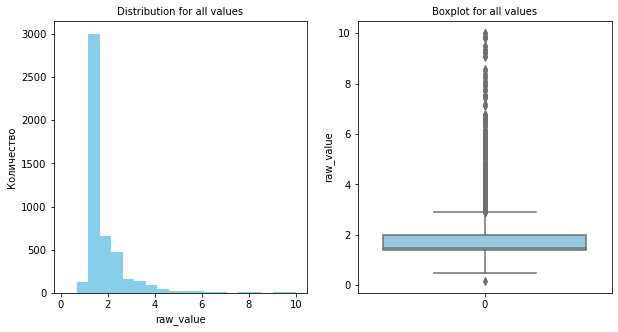

In [111]:
fig_time, ax_time = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax_time[0].hist(df['raw_value'], bins = 20, color='skyblue')
ax_time[0].set_title('Distribution for all values', fontsize=10)
ax_time[0].set_xlabel('raw_value', fontsize=10)
ax_time[0].set_ylabel('Количество', fontsize=10)

ax_time[1]= sns.boxplot(df['raw_value'], color='skyblue')
ax_time[1].set_title('Boxplot for all values', fontsize=10)
ax_time[1].set_ylabel('raw_value', fontsize=10)

plt.show()

The distribution looks too distantly like a normal distribution. 
Let's drop the outliers

In [112]:
q1, q3 = df['raw_value'].quantile([0.25, 0.75])
iqr = q3 - q1
mask = (df['raw_value'] > q3 + 1.5*iqr) | (df['raw_value'] < q1 - 1.5*iqr)
df = df[~mask]

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4539 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DOI                     4539 non-null   object 
 1   Date                    4146 non-null   object 
 2   Journal                 4539 non-null   object 
 3   Title                   4146 non-null   object 
 4   Name                    4535 non-null   object 
 5   measurement_error       4539 non-null   float64
 6   measurement_wavelength  547 non-null    object 
 7   measurement_method      4539 non-null   object 
 8   normalised_name         2661 non-null   object 
 9   raw_value               4360 non-null   float64
 10  specifier               4539 non-null   object 
dtypes: float64(2), object(9)
memory usage: 425.5+ KB


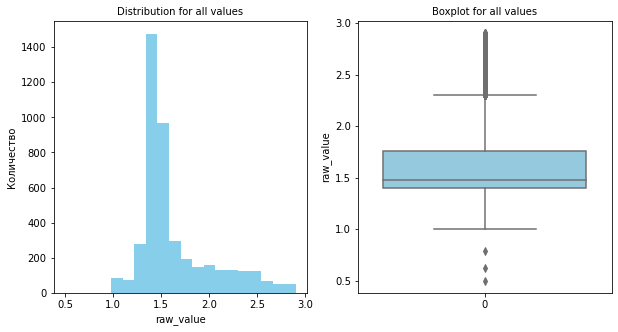

In [114]:
fig_time, ax_time = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax_time[0].hist(df['raw_value'], bins = 20, color='skyblue')
ax_time[0].set_title('Distribution for all values', fontsize=10)
ax_time[0].set_xlabel('raw_value', fontsize=10)
ax_time[0].set_ylabel('Количество', fontsize=10)

ax_time[1]= sns.boxplot(df['raw_value'], color='skyblue')
ax_time[1].set_title('Boxplot for all values', fontsize=10)
ax_time[1].set_ylabel('raw_value', fontsize=10)

plt.show()

got better, but you should delete values less than 1

In [115]:
df = df[df['raw_value'] >= 1] 

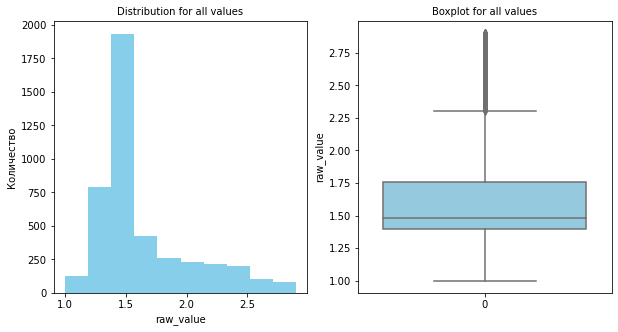

In [116]:
fig_time, ax_time = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax_time[0].hist(df['raw_value'], bins = 10, color='skyblue')
ax_time[0].set_title('Distribution for all values', fontsize=10)
ax_time[0].set_xlabel('raw_value', fontsize=10)
ax_time[0].set_ylabel('Количество', fontsize=10)

ax_time[1]= sns.boxplot(df['raw_value'], color='skyblue')
ax_time[1].set_title('Boxplot for all values', fontsize=10)
ax_time[1].set_ylabel('raw_value', fontsize=10)

plt.show()

# MEASUREMENT_WAVELENGHT

In [117]:
df.measurement_wavelength.unique()

array([nan, '632.8 nm', '2 nm', '510 nm', '633 nm', '650 nm', '543 nm',
       '2 μm', '550 nm', '589 nm', '98 nm', '0 nm', '1576.5 nm',
       '1.631 nm', '2640 nm', '500 nm', '0.8325 μm', '0.53 μm', '339 nm',
       '520 nm', '450 nm', '420 nm', '4.0 μm', '656.3 nm', '116 nm',
       '532 nm', '713.6 nm', '444 nm', '440 nm', '603 nm', '320 nm',
       '489 nm', '4 μm', '372 nm', '589.3 nm', '486.1 nm', '593 nm',
       '601.7 nm', '625 nm', '326 nm', '95 nm', '488 nm', '1550 nm',
       '9.6 μm', '543.5 nm', '1505.5 nm', '2600 nm', '0.3610 μm',
       '1.9457 μm', '620 nm', '589.5 nm', '114 nm', '399 nm', '1 nm',
       '514.5 nm', '1.5410 μm', '582.48 nm', '1064 nm', '560.5 nm',
       '2.1720 μm', '1.55 μm', '585 nm', '780 nm', '6.0 μm', '361.1 nm',
       '40 μm', '700 nm', '3.8 μm', '900 nm', '11.5 μm', '960 nm',
       '508 nm', '1 μm', '0.5893 μm', '688 nm', '0.5 nm', '1538 nm',
       '1.5 μm', '14.5 μm', '546.0 nm', '632 nm', '429 nm', '990 nm',
       '647 nm', '385 nm', '0.

In [118]:
import re

def extract_number(text):
    match = re.search(r'\d+\.?\d*', text)
    if match:
        return float(match.group())
    else:
        return None
df['measurement_wavelength'] = df['measurement_wavelength'].astype(str)

df['measurement_wavelength_extracted'] = df['measurement_wavelength'].apply(extract_number)
# a regular expression to find the first number with one dot
pattern = r'\d+\.\d'

# function for finding and extracting the first one-dot number from a string
def extract_number(string):
    match = re.search(pattern, string)
    if match:
        return match.group()
    else:
        return None

# apply the function to a target column
df['measurement_wavelength'] = df['measurement_wavelength'].apply(extract_number)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4357 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DOI                               4357 non-null   object 
 1   Date                              3971 non-null   object 
 2   Journal                           4357 non-null   object 
 3   Title                             3971 non-null   object 
 4   Name                              4353 non-null   object 
 5   measurement_error                 4357 non-null   float64
 6   measurement_wavelength            215 non-null    object 
 7   measurement_method                4357 non-null   object 
 8   normalised_name                   2541 non-null   object 
 9   raw_value                         4357 non-null   float64
 10  specifier                         4357 non-null   object 
 11  measurement_wavelength_extracted  543 non-null    float64
dtypes: flo

we have only 215 values, that is, 95% of the data are missing. Therefore, averaging or using the KNN algorithm is useless here.

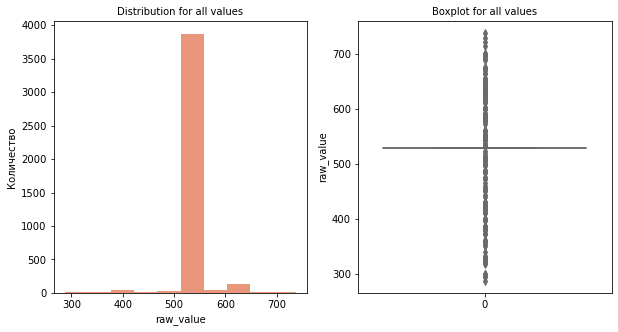

In [119]:
df11 = df

# make sure that averaging is a very bad idea
df11['measurement_wavelength_extracted'].fillna(df11['measurement_wavelength_extracted'].mean(), inplace=True)
df11 = df11[(df11['measurement_wavelength_extracted'] >= 250.0) & (df11['measurement_wavelength_extracted'] <= 750.0)]
fig_time, ax_time = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax_time[0].hist(df11['measurement_wavelength_extracted'], bins = 10, color='darksalmon')
ax_time[0].set_title('Distribution for all values', fontsize=10)
ax_time[0].set_xlabel('raw_value', fontsize=10)
ax_time[0].set_ylabel('Количество', fontsize=10)

ax_time[1]= sns.boxplot(df11['measurement_wavelength_extracted'], color='darksalmon')
ax_time[1].set_title('Boxplot for all values', fontsize=10)
ax_time[1].set_ylabel('raw_value', fontsize=10)

plt.show()

In [120]:
from bs4 import BeautifulSoup
import pandas as pd 
 
# define the url 
url = 'https://webbook.nist.gov/cgi/cbook.cgi?ID='
 
# load the dataframe 
df_wv = df11
df_wv = pd.DataFrame({'Chemical Name':df11['Name'], 
                   'Measurement Method':df11['measurement_method']})
  
# iterate over each row in the dataframe and get the wavelength from NIST Chemistry WebBook 
for index, row in df.iterrows(): 

    # create the full url for each chemical name and measurement method combination  
    full_url = url + row['Chemical Name'] + '&Mask=1000&Method=' + row['Measurement Method']

    # make a request to the url and parse it with Beautiful Soup    
    page = requests.get(full_url) 
    soup = BeautifulSoup(page.content, 'html.parser')

    # find all table rows in the webpage    
    table_rows = soup.find_all('tr')

    # iterate over each table row and get the wavelength for measurement method     
    for tr in table_rows: 

        if row['Measurement Method'] in tr.text:  

            td_list = tr.find_all('td')  

            # get the wavelength from 3rd column of table                        
            df.loc[index, 'Wavelength'] = td_list[2].text                                     
        else:                                 
            df.loc[index, 'Wavelength'] = None      

print(df)

KeyError: 'Chemical Name'

we tried to find the wavelength by the method of measurement and chemical name, but it was inconclusive. 
Of course, there are alternative ways, which we found, but did not have time to implement. For example, the descriptors we unloaded next have parameters that deduce the atoms in the molecule. If we go through them according to their respective characteristics, we will determine the one that is most capable of absorbing light. And then we can try to match the maximum absorption with the method of measurement.

# MEASUREMENT_ERROR

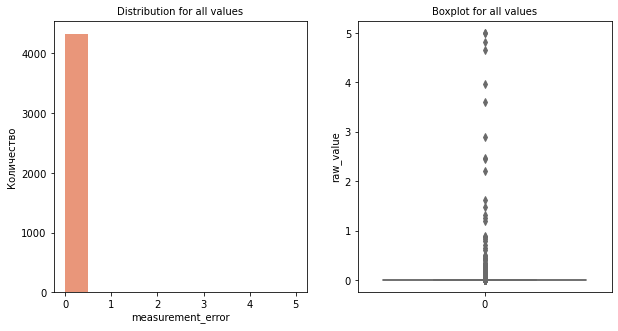

In [121]:
fig_time, ax_time = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax_time[0].hist(df['measurement_error'], bins = 10, color='darksalmon')
ax_time[0].set_title('Distribution for all values', fontsize=10)
ax_time[0].set_xlabel('measurement_error', fontsize=10)
ax_time[0].set_ylabel('Количество', fontsize=10)

ax_time[1]= sns.boxplot(df['measurement_error'], color='darksalmon')
ax_time[1].set_title('Boxplot for all values', fontsize=10)
ax_time[1].set_ylabel('raw_value', fontsize=10)

plt.show()

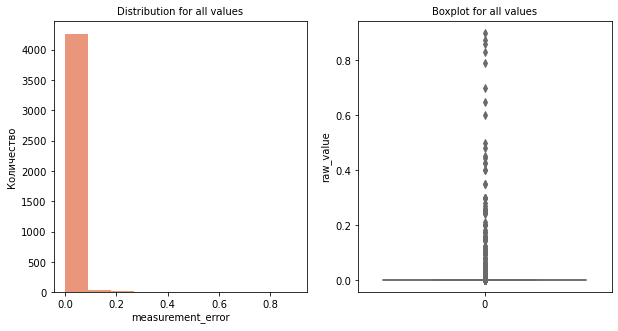

In [129]:
df122 = df[(df['measurement_error'] >= 0) & (df['measurement_error'] <= 1)]

fig_time, ax_time = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax_time[0].hist(df122['measurement_error'], bins = 10, color='darksalmon')
ax_time[0].set_title('Distribution for all values', fontsize=10)
ax_time[0].set_xlabel('measurement_error', fontsize=10)
ax_time[0].set_ylabel('Количество', fontsize=10)

ax_time[1]= sns.boxplot(df122['measurement_error'], color='darksalmon')
ax_time[1].set_title('Boxplot for all values', fontsize=10)
ax_time[1].set_ylabel('raw_value', fontsize=10)

plt.show()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4357 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DOI                               4357 non-null   object 
 1   Date                              3971 non-null   object 
 2   Journal                           4357 non-null   object 
 3   Title                             3971 non-null   object 
 4   Name                              4353 non-null   object 
 5   measurement_error                 4357 non-null   float64
 6   measurement_wavelength            215 non-null    object 
 7   measurement_method                4357 non-null   object 
 8   normalised_name                   2541 non-null   object 
 9   raw_value                         4357 non-null   float64
 10  specifier                         4357 non-null   object 
 11  measurement_wavelength_extracted  4357 non-null   float64
dtypes: flo

# MEASUREMENT_METHOD

In [122]:
df2 = df.groupby(['measurement_method'])['measurement_method'].count()
df2

measurement_method
el_cde_tables         1549
el_cde_text            393
el_mylogic            2046
rsc_cde_tables         219
rsc_cde_text           273
rsc_mylogic            109
snowball               313
springer_cde_table      23
springer_cde_text       63
Name: measurement_method, dtype: int64

In [235]:
material_stat = df['measurement_method'].describe()
material_dict = dict()

for key in df['measurement_method'].unique():
    sup = len(df[df['measurement_method'] == key].index)
    material_dict[key] = sup

pie_mat = ex.pie(values=material_dict.values(), names=material_dict.keys())
pie_mat.show()

method of measurement is a categorical chip, but we assume that it is not worth coding it frequency-wise, because the same substance can be measured by different methods and the properties of the molecule itself are not greatly affected.

# the column with the normalized chemical name is almost blank and often the coding does not correspond to the common format "SMILES".
This format is necessary for unloading descriptors of various types from open sources. 

In [156]:
name = df.Name.unique()
name_df = pd.DataFrame(name)
name_df.columns =  ['Name']
name_df

,Name
0,Ho2O3
1,Polyethylene
2,Dichloromethane
3,dimethylcarbonate
4,PVDF
...,...
1918,HgGa2S4
1919,AlF3
1920,2-Amino-2-methyl-1-propanol
1921,CuCl2·2H2O


In [159]:
import requests

# функция для поиска более универсальных названий химических веществ с помощью Chemical Identifier Resolver
def resolve_names(string):
    url = 'https://cactus.nci.nih.gov/chemical/structure/' + string + '/names'
    response = requests.get(url)
    if response.status_code == 200:
        names = response.json()
        if names:
            return ', '.join(names)
    return None

# применяем функцию к столбцу датафрейма и создаем новый столбец с найденными названиями
name_df['new_names'] = name_df['Name'].apply(resolve_names)


                                  DOI       Date                Journal  \
0       10.1016/j.jallcom.2018.04.218  4/21/2018                     18   
1     10.1016/j.commatsci.2017.05.022   6/6/2017                     22   
2           10.1016/j.saa.2019.01.023  1/15/2019                     23   
3           10.1016/j.jct.2014.02.016   3/3/2014                     16   
4                  10.1039/C6RA24011A  11/8/2016         039/C6RA24011A   
...                               ...        ...                    ...   
4995     10.1016/j.seppur.2010.05.008  5/19/2010                     08   
4996        10.1007/s00396-018-4308-9  4/16/2018  007/s00396-018-4308-9   
4997      10.1016/j.fluid.2018.05.033  6/18/2018                     33   
4998      10.1016/j.fluid.2015.01.023  1/30/2015                     23   
4999      10.1016/j.fluid.2005.08.006  9/26/2005                     06   

                                                  Title  \
0     SPECTROSCOPICTRAITSHOLMIUMINMAGNES

In [133]:
# filtering values by empty cells in SMILES
filtered_data = df2[df2['SMILES'].isna()]

# output the values from 'Name' for the filtered rows
lost_name=filtered_data['Name']

#  Chemical Identifier Resolver

In [81]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

identifiers  = individual_compounds_df['Compound']

for ids in identifiers :
    print(ids, CIRconvert(ids))
    
identifiers.to_csv('df_smiles.csv')

Ho2O3 Did not work
Polyethylene C=C
Dichloromethane ClCCl
dimethylcarbonate COC(=O)OC
PVDF Did not work
polystyrene C=Cc1ccccc1
Fucose C[C@H](O)[C@@H](O)[C@@H](O)[C@H](O)C=O
ZnS Did not work
Zinc [Zn]
ethanol CCO
Cefpodoxime [Na+].COCC1=C(N2[C@H](SC1)[C@H](NC(=O)C(=N/OC)\c3csc(N)n3)C2=O)C([O-])=O
nan Did not work
transcutol CCOCCOCCO
Ge10Sb30S50Te10 Did not work
Acetonitrile CC#N
ZrO2 O=[Zr]=O
TiO2 O=[Ti]=O
toluene Cc1ccccc1
ChCL CCl
2-Ethylhexanol CCCCC(CC)CO
alcohol CCO
Y2O3 Did not work
CuO [Cu++]1[O-]2[Cu++][O-]12
silica O=[Si]=O
SiO2 Did not work
CH3NO2 Did not work
SiC C=[SiH2]
Methanol CO
CH2Cl2 Did not work
Cyclopentan C1CCCC1
PbF2-TeO2-B2O3-Eu2O3 Did not work
BiZnBo– Did not work
CaBr2 [Ca++].[Br-].[Br-]
butyl laurate CCCCCCCCCCCC(=O)OCCCC
CaMn4Si5O15 Did not work
SC-CO2 Did not work
dimethylpolysiloxane C[Si](C)=O
DMC CC(O)(c1ccc(Cl)cc1)c2ccc(Cl)cc2
Methylamine CN
BBGE4 Did not work
trimethyl pentane CCCCC(C)(C)C
carbon C
Benzene c1ccccc1
BK7 Did not work
Heptane CCCCCCC
Etha

GeS2–As2S3 Did not work
dimethyladipate COC(=O)CCCCC(=O)OC
CdTe Did not work
DMA CC(C)=CCO[P](O)(=O)O[P](O)(O)=O
B2O3-(30-x)Bi2O3-xNiO Did not work
TEOS CCO[Si](OCC)(OCC)OCC
BPYb10 Did not work
Siliconchloride Cl[Si](Cl)(Cl)Cl
Apigenin Oc1ccc(cc1)C2=CC(=O)c3c(O)cc(O)cc3O2
Maltotetraose OCC1OC(OC2C(O)C(O)C(OC2CO)OC3C(O)C(O)C(OC3CO)OC4C(O)C(O)C(O)OC4CO)C(O)C(O)C1O
Fluorobenzene Fc1ccccc1
SiON Did not work
DAPI NC(=N)c1ccc(cc1)c2[nH]c3cc(ccc3c2)C(N)=N
NiTPP Did not work
Cyclohexane C1CCCCC1
CdGeAs2 Did not work
C–Cl Did not work
Sb2O3 Did not work
urea NC(N)=O
3,3-Dimethyl-1-butene CC(C)(C)C=C
FeSO4 Did not work
ZnPc2 Did not work
AOT [Na+].CCCCC(CC)COC(=O)CC(C(=O)OCC(CC)CCCC)[S]([O-])(=O)=O
ZnAlBiBTb2.0 Did not work
C9F20 Did not work
GaSb Did not work
Tetrachloromethane ClC(Cl)(Cl)Cl
TOL COc1ccc2c(cccc2c1C(F)(F)F)C(=S)N(C)CC(O)=O
cycloheptane C1CCCCCC1
Sc2O3 Did not work
MIBK CC(C)CC(C)=O
As45S55 Did not work
H2SO4 O[S](O)(=O)=O
cesium chloride [Cl-].[Cs+]
Polyacrylate OC(=O)C=C
PESu Di

Si0.032Ge0.899O0.069 Did not work
Al0.16Ga0.84As Did not work
BBFCEr0.5 Did not work
BSA CC(O[Si](C)(C)C)=N[Si](C)(C)C
InP CC(C)C[C@@H](CN1C[C@@H](NC(=O)[C@H](CC(C)C)NC(=O)OCc2ccncc2)C(=O)C1)NC(=O)OCc3ccccc3
Carbon C
BFO Did not work
GaP0.5Sb0.5 Did not work
silver [Ag]
Cyclohexanone O=C1CCCCC1
n-Octane CCCCCCCC
Zn2N3 Did not work
BBT2 Did not work
2-Butanol CCC(C)O
KDP Did not work
dichloromethane ClCCl
Isopropylalcohol CC(C)O
HOH O
PB-COOH-328-B − Did not work
ZrO O=[Zr]
SiO2(H) Did not work
p-Cresol Cc1ccc(O)cc1
calcium chloride [Cl-].[Cl-].[Ca++]
Triisooctylamine CC(C)CCCCCN(CCCCCC(C)C)CCCCCC(C)C
PNPPO OPPNP
Titanium white O=[Ti]=O
PbTe [Te]=[Pb]
LiBr-H2O Did not work
UNIL088 Did not work
AgO Did not work
CaF\(_2\)(Eu) 300 K Did not work
Halite [Na+].[Cl-]
BaSe Did not work
aniline Nc1ccccc1
C–H Did not work
Carbontetrachloride ClC(Cl)(Cl)Cl
Y1−xErxAl3(BO3)4glassythin Did not work
Ammonium nitrate [NH4+].[O-][N+]([O-])=O
As2S3 chalcogenide Did not work
Ge20As20Se60 Did not work
Au-

SiAlON Did not work
NaCl0.4KCl0.1KBr0.5 Did not work
B25Ti30 Did not work
IOL Oc1ccc(I)cc1
n-Dodecane CCCCCCCCCCCC
ITO-80W Did not work
Fluorite [O-][F]=O
N-Tetradecyl-triethylammonium CCCCCCCCCCCCCC[N+](CC)(CC)CC
Propane CCC
sugar OC[C@H]1O[C@H](O[C@]2(CO)O[C@H](CO)[C@@H](O)[C@@H]2O)[C@H](O)[C@@H](O)[C@@H]1O
p-Coumaric acid OC(=O)/C=C/c1ccc(O)cc1
Fe2SiO4 Did not work
THF C1CCOC1
AgAlGeSe4 Did not work
MgBr2 [Mg++].[Br-].[Br-]
WO3-xNd2O3 Did not work
Lumen CCC1(C(=O)NC(=O)NC1=O)c2ccccc2
Dichloromethan ClCCl
1-Chlorobutane CCCCCl
prolate CO[P](=S)(OC)SCN1C(=O)c2ccccc2C1=O
Cd0.60Se0.40 Did not work
K2O–TiO2 Did not work
TRITC [Cl-].CN(C)c1ccc2c(c1)[o+]c3cc(ccc3c2c4ccc(SC#N)cc4C(O)=O)N(C)C
Ge25As15Se60 Did not work
Mn2SiO4 Did not work
N2 PDA Did not work
(±)-Linalool CC(C)=CCCC(C)(O)C=C
BaO·2SiO2 Did not work
Ga15Se85 Did not work
Zn3N2 Did not work
Dimethyl formamide CN(C)C=O
Methyl pentanoate CCCCC(=O)OC
CdSiP2 Did not work
VBCFs Did not work
PCHMTC Did not work
Deionized water O
Mn1-x

ZnGeAs2 Did not work
carbon disulfide S=C=S
BST85 Did not work
Decamethylcyclopentasiloxane C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1
rhamnose C[C@H](O)[C@H](O)[C@@H](O)[C@@H](O)C=O
Cu(CH3COO)2·2Cu(OH)2 Did not work
poly(ethylenimine) C1CN1
ZnBh2 Did not work
COCH2CH2CH2 – Did not work
1-cyclohexylpiperazine C1CCC(CC1)N2CCNCC2
NaF [F-].[Na+]
Sb2CO3 Did not work
MeOH CO
HeLa Did not work
Bi12TiO20 Did not work
BPbF-Sm-2 Did not work
tin [SnH4]
1-Octadecene CCCCCCCCCCCCCCCCC=C
ZrOMc Did not work
Y2Sb2O7 Did not work
Tryptophan N[C@@H](Cc1c[nH]c2ccccc12)C(O)=O
Sn-Zno Did not work
Pb(II) PB[I]I
HPS O[P](O)(=O)Oc1ccccc1
InGaAsP Did not work
BPB BPB
Ba0.8Sr0.2TiO3 Did not work
InGaAs Did not work
C12H26 Did not work
TeOx Did not work
BBFBEu3 Did not work
SiO2–Al2O3 Did not work
CdSe Did not work
barium [BaH2]
C60[C(COOH)2]3 Did not work
1,1-Dichloroethane CC(Cl)Cl
oxyfluoride FOF
In0.093Ga0.906N0.031As0.968 Did not work
NMP CN1CCCC1=O
phosphate-borate OB(O)O.O[P](O)(O)=O
Urea N

Ge31S59I10 Did not work
3-Chloro-2-methylanisole COc1cccc(Cl)c1C
GeH4 [GeH4]
120-82-1 Clc1ccc(Cl)c(Cl)c1
GeTe Did not work
Ge20Se75Zn5 Did not work
chloroform ClC(Cl)Cl
Cyclohexene C1CCC=CC1
phloroglucinol Oc1cc(O)cc(O)c1
H(TiO2) Did not work
PHSQ–VE1D Did not work
tungsten oxide O=[W]
HfOxNy Did not work
MIAK CC(C)CCC(C)=O
CsGeI3 Did not work
Samarium [Sm]
PbTiO3 Did not work
LiZnLaAP Did not work
K-BK7 Did not work
Hydrochlorothiazide N[S](=O)(=O)c1cc2c(NCN[S]2(=O)=O)cc1Cl
1-Chloro-n-decane CCCCCCCCCCCl
BaGd2ZnO5 Did not work
Ertapenem C[C@@H](O)[C@@H]1[C@H]2[C@@H](C)C(=C(N2C1=O)C(O)=O)S[C@@H]3CN[C@@H](C3)C(=O)Nc4cccc(c4)C(O)=O
Propanol CCCO
Ge0.2Te0.8 Did not work
citric acid OC(=O)CC(O)(CC(O)=O)C(O)=O
TETA NCCNCCNCCN
Na2O·SiO2 Did not work
CmO1 Did not work
La21.72Si10O10.11N28.32 Did not work
Diisopropylamine CC(C)NC(C)C
NAP-4 Did not work
Ni0.96Sr0.04O Did not work
Dy2Ti2O7 Did not work
LaF3 [F-].[F-].[F-].[La+3]
Methylsalicylate COc1ccccc1C([O-])=O
Dibutylphthalate CCCCOC(=O)c1c

magnetite O=[Fe].O=[Fe]O[Fe]=O
PHBV Did not work
CH3 Did not work
Dimethylbenzene Cc1ccccc1C
NaCl0.3KCl0.1KBr0.6 Did not work
Cyclohexyl acetate CC(=O)OC1CCCCC1
GeSi Did not work
MALS CCCCCCCCCCCCS[As](C)SCCCCCCCCCCCC
Nonanoate CCCCCCCCC([O-])=O
NH-SOX Did not work
ncl3 ClN(Cl)Cl
CdI2 [Cd++].[I-].[I-]
Barium [BaH2]
C6F13 Did not work
VmKn Did not work
S.Y. S.[Y]
Chitin CC(=O)NC1[C@H](O)OC(CO)[C@@H](COC[C@@H]2OC(CO)[C@@H](COC[C@@H]3OC(CO)[C@@H](O)[C@@H](O)C3NC(C)=O)[C@@H](O)C2NC(C)=O)[C@H]1O
Dimethylsilicon C[SiH2]C
1-propanol CCCO
1,3-Butadiene C=CC=C
Sn–Sb Did not work
Brookite O=[Ti]=O
Triethylsulfonium CC[S+](CC)CC
NiF2 Did not work
Al(III)TPP Did not work
AgAlS2 Did not work
NiOx Did not work
GFLX O.O.O.COc1c(N2CCNC(C)C2)c(F)cc3C(=O)C(=CN(C4CC4)c13)C(O)=O.COc5c(N6CCNC(C)C6)c(F)cc7C(=O)C(=CN(C8CC8)c57)C(O)=O
2-Methylbutylammonium formate CCC(C)C[NH3+].[O-]C=O
ZnSiO3 Did not work
AgCl-AgBr Did not work
2-Butoxyethanol CCCCOCCO
1-Decanol CCCCCCCCCCO
1-Chloropropane CCCCl
cis-5-Decene 

In [9]:
lost_name = pd.DataFrame(lost_name)
lost_name

,Name
0,Ho2O3
1,Polyethylene
5,polystyrene
11,NaN
13,Ge10Sb30S50Te10
...,...
4987,Al2O3
4989,HgGa2S4
4994,CdS
4997,DMC


In [97]:
import pandas as pd
from pubchempy import get_compounds

df_name = pd.read_csv('D:\Аня учеба\SCAMT/name_for_smiles.csv')

# Function for obtaining the SMILES name of a molecule by chemical name
def get_smiles(name):
    try:
        compounds = get_compounds(name, 'name') # Obtaining a Compound object from PubChem by chemical name
        compound = compounds[0]# Getting the first Compound object from the list
        # Return of the SMILES-name molecule
        return compound.canonical_smiles
    except:
        return ''

# Adding a column with SMILES names of molecules to the table
df['SMILES'] = df_name['Name'].apply(get_smiles)

df.to_excel('chemicals_with_smiles.xlsx', index=False)

Later on the computer power was catastrophically insufficient, so this part of the code was put in parallel to the colab. 
And then we counted at all on the cluster, prescribing the script smiles.py and the command to execute it in a .sh file. Algorithm of action:

In [ ]:
smiles_sources = {'cirpy': [], 'pubchem': [], 'cactus': []}
for i,_ in df_initial.iterrows():
    name = df_initial['Name'][i]
    try:
        smiles_sources['cirpy'].append(cirpy.resolve(name, 'smiles'))
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/property/CanonicalSMILES/json"
        response = requests.get(url)
        data = json.loads(response.text)
        smiles_sources['pubchem'].append(data['PropertyTable']['Properties'][0]['CanonicalSMILES'])
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(name) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        smiles_sources['cactus'].append(ans)

    except:  # if any of the above fails, append 'None' to all sources of smiles list
        for _,smiles in smiles_sources.items():   # loop through all sources of smiles list
            smiles.append('None')

             # add the obtained lists to the dataframe as new columns
for source,smiles in smiles_sources.items():   # loop through all sources of smiles list
    df_initial[f'smiles_{source}'] = smiles

In [132]:
df2 = pd.read_excel('D:\Аня учеба\SCAMT/chemicals_with_smiles.xlsx')

# 1. PubChem

In [4]:
descriptors_pcp = pcp.get_compounds('NaCl', 'name', as_dataframe=True).columns.to_list()

#creating empty dataframes
df_pcp = pd.DataFrame(columns=descriptors_pcp)
df_none = pd.DataFrame(columns=descriptors_pcp, index=[0])

#iterating through each row
for i in range(len(df2)):
    try:
        #getting compounds from PubChem and addingъ
        comp = pcp.get_compounds(df2.loc[i,'SMILES'], 'smiles', as_dataframe=True).iloc[:1]
        df_pcp = df_pcp.append(comp)
    except:
        #if query is unsuccessful, add NaN 
        df_none.loc[0] = np.nan
        df_pcp = df_pcp.append(df_none)

#saving results to Excel file
df_pcp.to_excel('Describ_pubchem.xlsx', index=False)

atom_stereo_count
atoms
bond_stereo_count
bonds
cactvs_fingerprint
canonical_smiles
charge
complexity
conformer_id_3d
conformer_rmsd_3d
coordinate_type
covalent_unit_count
defined_atom_stereo_count
defined_bond_stereo_count
effective_rotor_count_3d
elements
exact_mass
feature_selfoverlap_3d
fingerprint
h_bond_acceptor_count
h_bond_donor_count
heavy_atom_count
inchi
inchikey
isomeric_smiles
isotope_atom_count
iupac_name
mmff94_energy_3d
mmff94_partial_charges_3d
molecular_formula
molecular_weight
monoisotopic_mass
multipoles_3d
pharmacophore_features_3d
record
rotatable_bond_count
shape_fingerprint_3d
shape_selfoverlap_3d
tpsa
undefined_atom_stereo_count
undefined_bond_stereo_count
volume_3d
xlogp


# 2.Material Studio Project

to retrieve data from this resource, you need to log in with a google account and get an individual key. There are also two ways to upload data: 
 - Using the pymatgen library 
 - with the new mp-api, but it didn't work for me


In [155]:
descriptors_pymatgen = []
for i in range(len(list(results[0]))):
    descriptors_pymatgen.append(list(results[0])[i][0])
    print(list(results[0])[i][0])

df_MP = pd.DataFrame(columns=descriptors_pymatgen)
df_nan = pd.DataFrame(columns=descriptors_pymatgen, index=[0])


for i, SMILES in enumerate(df2['SMILES']):
    try:    
        df_new_row = pd.DataFrame(columns=descriptors_pymatgen, index=[0])

        with MPRester('CNEKtjWMydgn4q4uOw3uXmukr5KQAB1i') as m:  # API key initialization
            results = m.summary.search(formula=SMILES)  # searching for formula data

        for i in range(len(list(results[0]))):  # filling DataFrame with search results  
            df_new_row.at[0, list(results[0])[i][0]] = list(results[0])[i][1]

        df_MP = pd.concat([df_MP, df_new_row], ignore_index=True)

    except:  # # if no data can be found, add a NaN line 
        df_MP = pd.concat([df_pymatgen, df_nan], ignore

                                
df_MP = df_MP.dropna(how="all", inplace=True)
df_MP.to_excel('descriptors_pymatgen.xlsx', index=False)                               

# 3. RdKit

In [4]:
# function to calculate RDKit descriptors for SMILES
def get_descriptors(smiles):
    # convert the SMILES string to an RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    
    # calculate a dictionary of all available RDKit descriptors for the molecule
    desc_dict = {}
    if mol is not None:  # check if the molecule is valid 
        for desc_name, desc_func in Descriptors.descList:  # loop through descriptors list 
            desc_dict[desc_name] = desc_func(mol)  # calculate descriptor value 

    else:  # if the molecule is not valid, return a dictionary with NaN 
        for desc_name, desc_func in Descriptors.descList:  
            desc_dict[desc_name] = np.nan

    return desc_dict

    
# drop any rows with missing values in the 'normalised_name' column
df2 = df2.dropna(subset=['SMILES'])

    
# calculate RDKit descriptors for each compound in the 'normalised_name' column    
df2.loc[:, 'Descib_rdkit'] = df2['SMILES'].apply(get_descriptors)

df2.to_excel("df_rdkit.xlsx", index=False)

[08:58:30] WARNING: not removing hydrogen atom without neighbors
[08:58:32] WARNING: not removing hydrogen atom without neighbors
[08:58:36] WARNING: not removing hydrogen atom without neighbors
[08:58:38] WARNING: not removing hydrogen atom without neighbors
[08:58:45] WARNING: not removing hydrogen atom without neighbors
[08:58:51] WARNING: not removing hydrogen atom without neighbors
[08:59:17] WARNING: not removing hydrogen atom without neighbors
[08:59:25] WARNING: not removing hydrogen atom without neighbors
[08:59:27] WARNING: not removing hydrogen atom without neighbors
[08:59:32] WARNING: not removing hydrogen atom without neighbors


# 3. Mordred

We used google colab because it's faster

In [131]:
def Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = []
    for smi in data:
        if isinstance(smi, float):
            mols.append(None) # skip missing or invalid SMILES strings
        else:
            mols.append(Chem.MolFromSmiles(smi))

    # remove any molecules that failed to convert from SMILES
    mols = [mol for mol in mols if mol is not None]

    df = pd.DataFrame(data)
    descriptors_df = calc.pandas(mols)

    # add the descriptor columns to the original dataframe
    for column in descriptors_df.columns:
        df[column] = descriptors_df[column]

    return df

mordred_descriptors = Mordred_descriptors(df2['SMILES'])

mordred_descriptors.to_excel('description_mordred.xlsx')

In [136]:
mordred_descriptors = pd.read_excel('D:\Аня учеба\SCAMT/description_mordred.xlsx')

In [137]:
df_rdkit = pd.read_excel('D:\Аня учеба\SCAMT/description_rdkit.xlsx')

In [207]:
df_MP = pd.read_excel('D:\Аня учеба\SCAMT/df_pymatgen.xlsx')

In [208]:
df_pcp = pd.read_excel('D:\Аня учеба\SCAMT/df_pcp.xlsx')

In [209]:
df2 = pd.read_excel('D:\Аня учеба\SCAMT/chemicals_with_smiles.xlsx')

In [ ]:
df_fin=df_fin.dropna(subset=['normalised_name'])
df_fin=df_fin.dropna(subset=['SMILES'])

In [214]:
df_fin.drop(columns=['normalised_name'], inplace = True)
df_fin.drop(columns=['measurement_wavelength'], inplace = True)

# Now we can combine all the collected descriptors into one table

In [210]:
df_fin = pd.concat([df2, df_pcp, df_MP, mordred_descriptors], axis=1)

In [212]:
df_fin=df_fin.dropna(subset=['SMILES'])

In [217]:
df_fin=df_fin.drop_duplicates()

In [219]:
df_fin.isna().sum()

DOI           0
Date        132
Journal     132
Title       132
Name          0
           ... 
WPol          0
Zagreb1       0
Zagreb2       0
mZagreb1      0
mZagreb2      0
Length: 1956, dtype: int64

In [171]:
# Select only numeric columns with empty values 
num_cols = df_fin.select_dtypes(include=['float', 'int']).columns[df_fin.isna().any()].tolist()  

# run the KNNImputer with the default parameter n_neighbors=5.  
imputer = KNNImputer(n_neighbors=5)    
df_fin[num_cols] = imputer.fit_transform(df_fin[num_cols])
df_fin.isna().sum()

DOI           0
Date        132
Journal     132
Title       132
Name          0
           ... 
WPol          0
Zagreb1       0
Zagreb2       0
mZagreb1      0
mZagreb2      0
Length: 1958, dtype: int64

In [220]:
df_fin

,DOI,Date,Journal,Title,Name,measurement_error,measurement_method,raw_value,specifier,SMILES,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
2,10.1016/j.saa.2019.01.023,1/15/2019,Spectrochimica Acta Part A: Molecular and Biom...,SOLVENTEFFECTSABSORPTIONFLUORESCENCESPECTRAZAL...,Dichloromethane,0.00,el_cde_tables,1.4244,n,C(Cl)Cl,...,8.745603,41.377398,197.992939,10.420681,227.0,10.0,52.0,51.0,7.034722,2.625000
3,10.1016/j.jct.2014.02.016,3/3/2014,The Journal of Chemical Thermodynamics,HEATCAPACITIESASYMMETRICCRITICALITYLIQUIDLIQUI...,dimethylcarbonate,0.00,el_mylogic,1.389,n,COC(=O)OC,...,4.174387,17.310771,46.041865,5.115763,4.0,0.0,6.0,4.0,2.25,1.000000
4,10.1039/C6RA24011A,11/8/2016,RSC Advances,Temperature tunable photonic band gap in polyv...,PVDF,0.00,rsc_cde_text,1.45,refractive index,C=C(F)F,...,10.523822,77.504048,427.062025,9.490267,2096.0,44.0,146.0,176.0,10.722222,6.333333
6,10.1016/j.talanta.2013.11.024,11/19/2013,Talanta,IONEXCHANGECHROMATOGRAPHYCOMBINEDDIRECTCURRENT...,Fucose,0.00,el_cde_tables,3.9,n,CC1C(C(C(C(O1)O)O)O)O,...,10.523822,77.504048,427.062025,9.490267,2096.0,44.0,146.0,176.0,10.722222,6.333333
7,10.1016/j.physe.2016.07.023,7/25/2016,Physica E: Low-dimensional Systems and Nanostr...,MANGANESEEFFECTMAGNETISMOPTICALPROPERTIESESPEC...,ZnS,0.00,el_cde_text,2.9,refractive index n,C(CC(=O)OP(=O)(O)O)C(=O)O,...,4.174387,17.310771,41.026549,6.837758,4.0,0.0,6.0,4.0,2.25,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,10.1016/j.jlumin.2009.09.002,9/12/2009,Journal of Luminescence,STUDYINTERACTIONBETWEENPROTEINMAINACTIVECOMPON...,Naringin,0.00,el_cde_tables,1.214,n,CC1C(C(C(C(O1)OC2C(C(C(OC2OC3=CC(=C4C(=O)CC(OC...,...,0.000000,1.000000,18.010565,6.003522,0.0,0.0,0.0,0.0,divide by zero encountered in power (mZagreb1),0.000000
2304,10.1016/j.snb.2011.02.033,2/24/2011,Sensors and Actuators B: Chemical,SNO2THINFILMSENSORENHANCEDRESPONSEFORNO2GASLOW...,SnO2,0.00,el_mylogic,2,Refractive index (at 470 nm),O=[Sn]=O,...,10.309053,79.059922,329.073118,9.140920,1141.0,34.0,128.0,156.0,6.229167,4.972222
2305,10.1039/C6CP00199H,3/16/2016,Physical Chemistry Chemical Physics,Molecular interactions between ammonium-based ...,2-Hydroxyethylammonium formate,0.00,rsc_cde_tables,1.4516,Refractive indices,C(CO)N.C(=O)O,...,7.625107,29.418928,87.993613,17.598723,16.0,0.0,20.0,16.0,4.0625,1.000000
2306,10.1039/C3NR04978G,12/5/2013,Nanoscale,Nanodevice-induced conformational and function...,EGTA,0.06,rsc_cde_tables,5.57 ± 0.06,n,C(COCCOCCN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O,...,8.302762,47.572444,99.068414,6.191776,40.0,5.0,32.0,35.0,2.972222,1.611111


In [232]:
df_fin = df_fin.loc[:,~df_fin.columns.duplicated()] 
df_fin.index = range(len(df_fin))
df_fin

,DOI,Date,Journal,Title,Name,measurement_error,measurement_method,raw_value,specifier,SMILES,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,10.1016/j.saa.2019.01.023,1/15/2019,Spectrochimica Acta Part A: Molecular and Biom...,SOLVENTEFFECTSABSORPTIONFLUORESCENCESPECTRAZAL...,Dichloromethane,0.00,el_cde_tables,1.4244,n,C(Cl)Cl,...,8.745603,41.377398,197.992939,10.420681,227.0,10.0,52.0,51.0,7.034722,2.625000
1,10.1016/j.jct.2014.02.016,3/3/2014,The Journal of Chemical Thermodynamics,HEATCAPACITIESASYMMETRICCRITICALITYLIQUIDLIQUI...,dimethylcarbonate,0.00,el_mylogic,1.389,n,COC(=O)OC,...,4.174387,17.310771,46.041865,5.115763,4.0,0.0,6.0,4.0,2.25,1.000000
2,10.1039/C6RA24011A,11/8/2016,RSC Advances,Temperature tunable photonic band gap in polyv...,PVDF,0.00,rsc_cde_text,1.45,refractive index,C=C(F)F,...,10.523822,77.504048,427.062025,9.490267,2096.0,44.0,146.0,176.0,10.722222,6.333333
3,10.1016/j.talanta.2013.11.024,11/19/2013,Talanta,IONEXCHANGECHROMATOGRAPHYCOMBINEDDIRECTCURRENT...,Fucose,0.00,el_cde_tables,3.9,n,CC1C(C(C(C(O1)O)O)O)O,...,10.523822,77.504048,427.062025,9.490267,2096.0,44.0,146.0,176.0,10.722222,6.333333
4,10.1016/j.physe.2016.07.023,7/25/2016,Physica E: Low-dimensional Systems and Nanostr...,MANGANESEEFFECTMAGNETISMOPTICALPROPERTIESESPEC...,ZnS,0.00,el_cde_text,2.9,refractive index n,C(CC(=O)OP(=O)(O)O)C(=O)O,...,4.174387,17.310771,41.026549,6.837758,4.0,0.0,6.0,4.0,2.25,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,10.1016/j.jlumin.2009.09.002,9/12/2009,Journal of Luminescence,STUDYINTERACTIONBETWEENPROTEINMAINACTIVECOMPON...,Naringin,0.00,el_cde_tables,1.214,n,CC1C(C(C(C(O1)OC2C(C(C(OC2OC3=CC(=C4C(=O)CC(OC...,...,0.000000,1.000000,18.010565,6.003522,0.0,0.0,0.0,0.0,divide by zero encountered in power (mZagreb1),0.000000
1566,10.1016/j.snb.2011.02.033,2/24/2011,Sensors and Actuators B: Chemical,SNO2THINFILMSENSORENHANCEDRESPONSEFORNO2GASLOW...,SnO2,0.00,el_mylogic,2,Refractive index (at 470 nm),O=[Sn]=O,...,10.309053,79.059922,329.073118,9.140920,1141.0,34.0,128.0,156.0,6.229167,4.972222
1567,10.1039/C6CP00199H,3/16/2016,Physical Chemistry Chemical Physics,Molecular interactions between ammonium-based ...,2-Hydroxyethylammonium formate,0.00,rsc_cde_tables,1.4516,Refractive indices,C(CO)N.C(=O)O,...,7.625107,29.418928,87.993613,17.598723,16.0,0.0,20.0,16.0,4.0625,1.000000
1568,10.1039/C3NR04978G,12/5/2013,Nanoscale,Nanodevice-induced conformational and function...,EGTA,0.06,rsc_cde_tables,5.57 ± 0.06,n,C(COCCOCCN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O,...,8.302762,47.572444,99.068414,6.191776,40.0,5.0,32.0,35.0,2.972222,1.611111


At the beginning there was a problem with the 'specifier' column. We have not yet worked out the final way of working with it, but there is an assumption that it will still be possible to pull the absorption wavelength from it. For now we use a simple frequency coding and leave it in our dataset

In [237]:
# Create a counter 
freq = df_fin['specifier'].value_counts() 
  
## Add a counter to the dataframe using map() 
df_fin['Freq_specifier'] = df_fin['specifier'].map(freq) 
  
# Output the dataframe with frequency coding  
df_fin

,DOI,Date,Journal,Title,Name,measurement_error,measurement_method,raw_value,specifier,SMILES,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Freq_specifier
0,10.1016/j.saa.2019.01.023,1/15/2019,Spectrochimica Acta Part A: Molecular and Biom...,SOLVENTEFFECTSABSORPTIONFLUORESCENCESPECTRAZAL...,Dichloromethane,0.00,el_cde_tables,1.4244,n,C(Cl)Cl,...,41.377398,197.992939,10.420681,227.0,10.0,52.0,51.0,7.034722,2.625000,576
1,10.1016/j.jct.2014.02.016,3/3/2014,The Journal of Chemical Thermodynamics,HEATCAPACITIESASYMMETRICCRITICALITYLIQUIDLIQUI...,dimethylcarbonate,0.00,el_mylogic,1.389,n,COC(=O)OC,...,17.310771,46.041865,5.115763,4.0,0.0,6.0,4.0,2.25,1.000000,576
2,10.1039/C6RA24011A,11/8/2016,RSC Advances,Temperature tunable photonic band gap in polyv...,PVDF,0.00,rsc_cde_text,1.45,refractive index,C=C(F)F,...,77.504048,427.062025,9.490267,2096.0,44.0,146.0,176.0,10.722222,6.333333,181
3,10.1016/j.talanta.2013.11.024,11/19/2013,Talanta,IONEXCHANGECHROMATOGRAPHYCOMBINEDDIRECTCURRENT...,Fucose,0.00,el_cde_tables,3.9,n,CC1C(C(C(C(O1)O)O)O)O,...,77.504048,427.062025,9.490267,2096.0,44.0,146.0,176.0,10.722222,6.333333,576
4,10.1016/j.physe.2016.07.023,7/25/2016,Physica E: Low-dimensional Systems and Nanostr...,MANGANESEEFFECTMAGNETISMOPTICALPROPERTIESESPEC...,ZnS,0.00,el_cde_text,2.9,refractive index n,C(CC(=O)OP(=O)(O)O)C(=O)O,...,17.310771,41.026549,6.837758,4.0,0.0,6.0,4.0,2.25,1.000000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,10.1016/j.jlumin.2009.09.002,9/12/2009,Journal of Luminescence,STUDYINTERACTIONBETWEENPROTEINMAINACTIVECOMPON...,Naringin,0.00,el_cde_tables,1.214,n,CC1C(C(C(C(O1)OC2C(C(C(OC2OC3=CC(=C4C(=O)CC(OC...,...,1.000000,18.010565,6.003522,0.0,0.0,0.0,0.0,divide by zero encountered in power (mZagreb1),0.000000,576
1566,10.1016/j.snb.2011.02.033,2/24/2011,Sensors and Actuators B: Chemical,SNO2THINFILMSENSORENHANCEDRESPONSEFORNO2GASLOW...,SnO2,0.00,el_mylogic,2,Refractive index (at 470 nm),O=[Sn]=O,...,79.059922,329.073118,9.140920,1141.0,34.0,128.0,156.0,6.229167,4.972222,1
1567,10.1039/C6CP00199H,3/16/2016,Physical Chemistry Chemical Physics,Molecular interactions between ammonium-based ...,2-Hydroxyethylammonium formate,0.00,rsc_cde_tables,1.4516,Refractive indices,C(CO)N.C(=O)O,...,29.418928,87.993613,17.598723,16.0,0.0,20.0,16.0,4.0625,1.000000,10
1568,10.1039/C3NR04978G,12/5/2013,Nanoscale,Nanodevice-induced conformational and function...,EGTA,0.06,rsc_cde_tables,5.57 ± 0.06,n,C(COCCOCCN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O,...,47.572444,99.068414,6.191776,40.0,5.0,32.0,35.0,2.972222,1.611111,576


# normalization step

In [239]:
# create new dataframe with only numeric columns
num_df_fin = df_fin.select_dtypes(include=['int64', 'float64'])
# create new dataframe with categoric columns
df_nonnum = df_fin.select_dtypes(exclude=['int', 'float'])

In [251]:
print(np.isinf(num_df_fin).any())  # check for infinite values

measurement_error    False
atom_stereo_count    False
bond_stereo_count    False
charge               False
complexity           False
                     ...  
WPol                 False
Zagreb1              False
Zagreb2              False
mZagreb2             False
Freq_specifier       False
Length: 688, dtype: bool


In [268]:
from sklearn.preprocessing import MinMaxScaler

# create instance of StandardScaler
scaler = MinMaxScaler()

# Drop columns with infinite values 
num_col = list(df_fin.select_dtypes(include=[np.number]).columns)

# Convert the normalized data back to a pandas DataFrame
df_normalized = pd.DataFrame(df_fin, columns=df345.columns)

# fit and transform numeric dataset
normalized_df = scaler.fit_transform(num_df_fin)
normalized_df = pd.DataFrame(normalized_df, columns=num_df_fin.columns)


In [266]:
df_normalized.shape

(1570, 1953)

In [ ]:
df_fin.to_excel('df_fin.xlsx')